In [85]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

## <b>Data Collection<b>

In [86]:
# Loading Datasets
books = pd.read_csv(r'Dataset\Books.csv',encoding='latin-1')
ratings = pd.read_csv(r'Dataset\Ratings.csv',encoding='latin-1')
users = pd.read_csv(r'Dataset\Users.csv',encoding='latin-1')

In [87]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [88]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [89]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [90]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [91]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [92]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [93]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [94]:
books.duplicated().sum()

0

In [95]:
ratings.duplicated().sum()

0

In [96]:
users.duplicated().sum()

0

#### Merging books, ratings, users dataframes into a single dataframe

In [97]:
merged_data = pd.merge(users,ratings,on='User-ID')
merged_data = pd.merge(merged_data, books,on='ISBN')

In [98]:
merged_data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [99]:
merged_data.columns

Index(['User-ID', 'Location', 'Age', 'ISBN', 'Book-Rating', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [100]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   Location             1031136 non-null  object 
 2   Age                  753301 non-null   float64
 3   ISBN                 1031136 non-null  object 
 4   Book-Rating          1031136 non-null  int64  
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031134 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


In [101]:
merged_data.shape

(1031136, 12)

In [102]:
merged_data.duplicated().sum()

0

In [103]:
# Create a country column at the place of location 
merged_data['Country'] = merged_data['Location'].astype(str).apply(lambda x:x.split(',')[-1])

# Drop the Location column
merged_data.drop(columns='Location',inplace=True)

In [104]:
merged_data.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,n/a
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,canada


In [105]:
# Unique values in the country column
merged_data['Country'].unique()

array([' usa', ' canada', ' n/a', '', ' malaysia', ' spain',
       ' new zealand', ' finland', ' united kingdom', ' portugal',
       ' brazil', ' germany', ' austria', ' italy', ' netherlands',
       ' australia', ' france', ' costa rica', ' poland', ' us', ' iran',
       ' aruba', ' india', ' pakistan', ' taiwan', ' singapore',
       ' argentina', ' romania', ' greece', ' ireland', ' philippines',
       ' belgium', ' philippines"', ' mexico', ' south africa',
       ' burkina faso', ' croatia', ' switzerland', ' denmark', ' rwanda',
       ' yugoslavia', ' turkey', ' china', ' japan', ' qatar', ' latvia',
       ' sweden', ' kuwait', ' indonesia', ' nepal', ' peru',
       ' venezuela', ' south korea"', ' hong kong', ' united states',
       ' slovakia', ' norway', ' dominican republic',
       ' bosnia and herzegovina', ' south korea', ' macedonia', ' kenya',
       ' mauritius', ' catalonia', ' nigeria', ' madagascar', ' israel',
       ' oman', ' egypt', ' lithuania', ' guate

In [106]:
# Fixing unknown and missing countries

merged_data['Country'] = merged_data['Country'].replace(' ','other').replace('n/a','other')

In [107]:
# Droping Unnecessary columns


merged_data.drop(columns=['Image-URL-S','Image-URL-L'],inplace=True)

In [108]:
merged_data.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,n/a
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,canada


In [109]:
merged_data.isna().sum()

User-ID                     0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
Image-URL-M                 0
Country                     0
dtype: int64

<i>Since we can see that book_author and publisher columns have negligible missing values, so we can drop these records which is not going to impact on overall accuracy.<i>

In [110]:
# Droping null values in 'Book-Author', 'Publisher' columns
merged_data.dropna(subset=['Book-Author', 'Publisher'],inplace=True)


In [111]:
merged_data.isna().sum()

User-ID                     0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Image-URL-M                 0
Country                     0
dtype: int64

In [112]:
merged_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1

In [113]:
# Extracting the mismatched values in features 'Year_Of_Publication', 'Publisher', 'book_author', and 'book_title'

index_list = list(merged_data[ (merged_data['Year-Of-Publication'] == 'DK Publishing Inc') | (merged_data['Year-Of-Publication'] == 'Gallimard')].index)

In [114]:
index_list

[906829, 913994, 946370, 946371]

In [115]:
# dropping records which have mismatched values
merged_data.drop(index=index_list,inplace=True)

In [116]:
merged_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, '2002', 1977, 1975, 1965, 1941, 1970,
       '1996', '1999', 1972, '1989', '1992', '2001', 1953, 1962, 1973,
       '2004', 1960, '1997', '2000', '0', 1954, 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1

In [117]:
merged_data['Year-Of-Publication'] = merged_data['Year-Of-Publication'].astype('int64')

In [118]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031128 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031128 non-null  int64  
 1   Age                  753295 non-null   float64
 2   ISBN                 1031128 non-null  object 
 3   Book-Rating          1031128 non-null  int64  
 4   Book-Title           1031128 non-null  object 
 5   Book-Author          1031128 non-null  object 
 6   Year-Of-Publication  1031128 non-null  int64  
 7   Publisher            1031128 non-null  object 
 8   Image-URL-M          1031128 non-null  object 
 9   Country              1031128 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 86.5+ MB


## **Exploratory Data Analysis**

<Axes: >

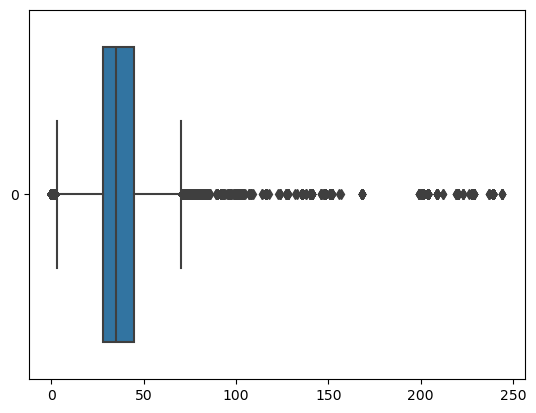

In [119]:
sns.boxplot(merged_data['Age'],orient='h')

<i>It can be clearly seen that a lot of **outliers** are present in **age** column.</i>

In [120]:
# Outlier data became NaN

merged_data.loc[(merged_data['Age'] > 100) | (merged_data['Age'] < 5),'Age'] = np.nan

In [121]:
# Imputing null values

median = merged_data['Age'].median()
std = merged_data['Age'].std()

# Fill invalid and missing ages with random normal distributed numbers
random_age = np.random.randint(median - std, median + std, size = merged_data['Age'].isna().sum())
age = merged_data['Age'].copy()
age[pd.isnull(age)] = random_age
merged_data['Age'] = age
merged_data['Age'] = merged_data['Age'].astype('int64')

In [122]:
merged_data['Age'].isna().sum()

0

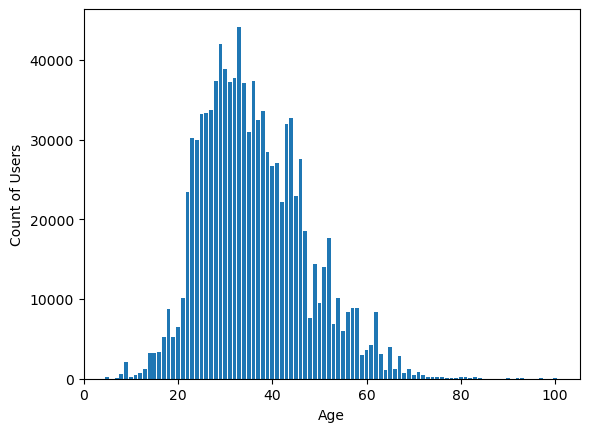

In [123]:
# Distribution of age after removing outliers and fixing missing values

u = merged_data.Age.value_counts().sort_index() # counting the values of Age
plt.bar(u.index, u.values) # barplot
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.xlim(xmin = 0)
plt.show()

<i>It's observable that **maximum** number of users were of the **age** in between **20 to 45**. </i>

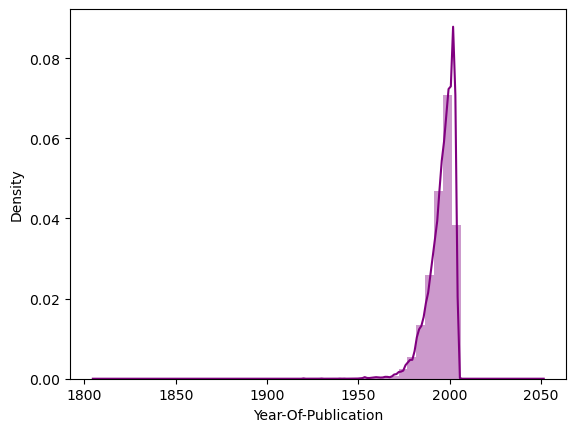

In [124]:
# showing the distribution of Year of Publication.

sns.distplot(merged_data[merged_data['Year-Of-Publication']>1800]['Year-Of-Publication'],color='purple',bins=50);

<i>There was an exponential increase in **book publication** after the year **1950**.</i>

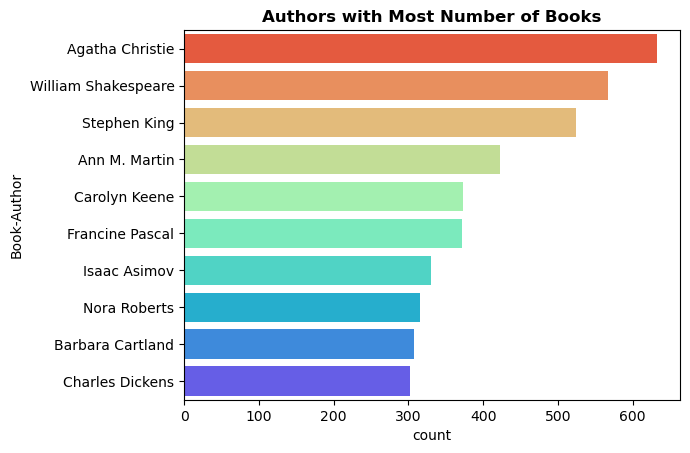

In [125]:
# ploatting the count of top 10 books using coutplot.

sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index, palette='rainbow_r')
plt.title("Authors with Most Number of Books", fontweight='bold');

<i>Authors with the most books were **Agatha Christie, William Shakespeare** and **Stephen King**.</i>

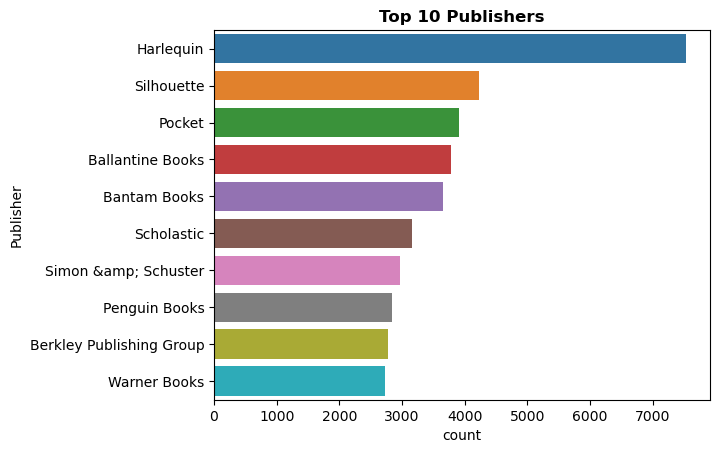

In [126]:
# Counting the top the publisher using countplot of seaborn 

sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers', fontweight='bold');

<i>Publisher with **highest** number of books published was **Harlequin** followed by **Solhoutte** and **Pocket**.</i>

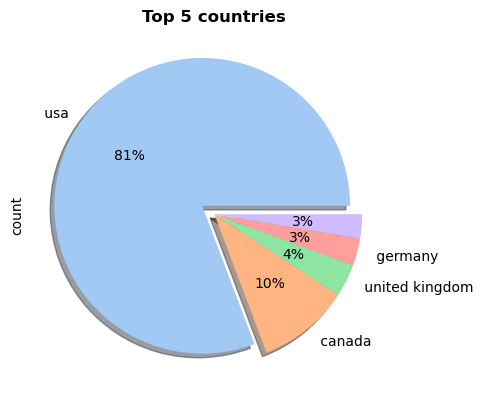

In [127]:
# Pie Graph of top five countires.

palette_color = sns.color_palette('pastel')
explode = (0.1, 0, 0, 0, 0)
merged_data.Country.value_counts().iloc[:5].plot(kind='pie', colors=palette_color, autopct='%.0f%%', explode=explode, shadow=True)
plt.title('Top 5 countries', fontweight='bold');

<i>Most of the **readers** were from **USA** followed by **Canada**.</i>

# **Recommender Systems**

### <b>Popularity based Recommendation System<b>

In [128]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031128 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031128 non-null  int64 
 1   Age                  1031128 non-null  int64 
 2   ISBN                 1031128 non-null  object
 3   Book-Rating          1031128 non-null  int64 
 4   Book-Title           1031128 non-null  object
 5   Book-Author          1031128 non-null  object
 6   Year-Of-Publication  1031128 non-null  int64 
 7   Publisher            1031128 non-null  object
 8   Image-URL-M          1031128 non-null  object
 9   Country              1031128 non-null  object
dtypes: int64(4), object(6)
memory usage: 86.5+ MB


In [129]:
merged_data['Avg_Ratings'] = merged_data.groupby('Book-Title')['Book-Rating'].transform('mean')

merged_data['No_of_Ratings'] = merged_data.groupby('Book-Title')['Book-Rating'].transform('count')

Popular_data = merged_data[['Book-Title','Avg_Ratings','No_of_Ratings']]


In [130]:
Popular_data.head()

,Book-Title,Avg_Ratings,No_of_Ratings
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
2,Clara Callan,4.928571,14
3,Clara Callan,4.928571,14
4,Clara Callan,4.928571,14


In [131]:
Popular_data.drop_duplicates('Book-Title',inplace=True)

In [132]:
Popular_data.head()

,Book-Title,Avg_Ratings,No_of_Ratings
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
15,Decision in Normandy,5.000000,3
18,Flu: The Story of the Great Influenza Pandemic...,4.272727,11
29,The Mummies of Urumchi,0.000000,1


In [133]:
# Top 20 recommended books

Popular_data[Popular_data['No_of_Ratings'] > 200].sort_values('Avg_Ratings',ascending=False).head(20)

,Book-Title,Avg_Ratings,No_of_Ratings
32601,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
33024,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
37538,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
33218,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
72126,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,249
32080,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
167539,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
37807,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368
125266,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575
37870,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260


### <b>Collaborative Filtering<b>

#### <b>Item Based<b>

* Every user's rating at facevalue can't be considered because if the user is a **novice reader** with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.
* Therefore as a general rule of thumb let's consider only those Users who have rated atleast **50** books and only those books which have got atleast **180** ratings.

In [134]:
merged_data.shape

(1031128, 12)

In [135]:
x = merged_data.groupby('User-ID').count()['Book-Rating'] > 180

In [136]:
x[x]

User-ID
254       True
2033      True
2276      True
2766      True
2977      True
          ... 
277427    True
277478    True
277639    True
278188    True
278418    True
Name: Book-Rating, Length: 918, dtype: bool

In [137]:
merged_data['User-ID'].isin(x[x].index)

0          False
1          False
2          False
3           True
4          False
           ...  
1031131    False
1031132    False
1031133    False
1031134    False
1031135    False
Name: User-ID, Length: 1031128, dtype: bool

In [138]:
merged_data.shape

(1031128, 12)

In [139]:
merged_data = merged_data[merged_data['Book-Rating'] != 0]

In [140]:
merged_data.shape

(383837, 12)

In [141]:
# Applying constraint on user id using it's count

x = merged_data.groupby('User-ID').count()['Book-Rating'] > 180

filtered_data = merged_data[merged_data['User-ID'].isin(x[x].index)]

In [142]:
# Applying constraint on number of rartings

y = merged_data.groupby('Book-Title').count()['Book-Rating'] > 50

filtered_data = filtered_data[filtered_data['Book-Title'].isin(y[y].index)]

In [143]:
filtered_data.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Country,Avg_Ratings,No_of_Ratings
31,11676,45,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,n/a,2.996785,311
34,46398,37,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,usa,2.996785,311
54,230522,52,0399135782,7,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,usa,2.996785,311
58,245827,27,0399135782,9,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,,2.996785,311
106,7346,49,0440234743,9,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,usa,3.179903,617


In [144]:
filtered_data.shape

(5432, 12)

In [145]:
# From a user item matrix with values as ratings

filtered_data_pivot_table = filtered_data.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating').fillna(0)

In [146]:
filtered_data_pivot_table

User-ID,2276,4385,6251,6575,7346,11676,12982,13552,16634,16795,...,258534,261829,262998,264321,265115,265889,268932,269566,270713,274061
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,8.0,10.000000,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,9.0,...,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,10.0,0.0,0.0,0.0,0.0,7.500000,0.0,0.0,0.0,0.0,...,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,8.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wizard and Glass (The Dark Tower, Book 4)",0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# Create an object of csr matrix
# Sparse Matrix Representations 
book_sparse = csr_matrix(filtered_data_pivot_table.values)

In [148]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [149]:
# Building a KNN model with Cosine Similarity as the target metric for calculating the distances.

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=5)
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [150]:
distance, suggestion = model.kneighbors(filtered_data_pivot_table.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [151]:
distance

array([[0.        , 0.26782053, 0.41836188, 0.47931218, 0.50389856,
        0.51149563]])

In [152]:
suggestion

array([[237, 202, 574, 414,  79,  80]], dtype=int64)

In [153]:
for i in range(len(suggestion)):
    print(filtered_data_pivot_table.index[suggestion[i]])

Index(['In Her Shoes : A Novel', 'Good in Bed', 'The Woman Next Door',
       'The Beach House', 'Blow Fly: A Scarpetta Novel', 'Blue Diary'],
      dtype='object', name='Book-Title')


In [154]:
book_names = filtered_data_pivot_table.index

In [155]:
book_names[3]

'4 Blondes'

In [156]:
np.where(filtered_data_pivot_table.index == '4 Blondes')[0][0]

3

In [157]:
ids = np.where(merged_data['Book-Title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]
ids

13271

In [158]:
merged_data.loc[ids]['Image-URL-M']

'http://images.amazon.com/images/P/3150000335.01.MZZZZZZZ.jpg'

In [159]:
book_name = []
for book_id in suggestion:
    book_name.append(filtered_data_pivot_table.index[book_id])

In [160]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(filtered_data['Book-Title'] == name)[0][0]
    ids_index.append(ids)

In [161]:
for idx in ids_index:
    url = filtered_data.iloc[idx]['Image-URL-M']
    print(url)

http://images.amazon.com/images/P/0743418190.01.MZZZZZZZ.jpg
http://images.amazon.com/images/P/0743418174.01.MZZZZZZZ.jpg
http://images.amazon.com/images/P/0743411250.01.MZZZZZZZ.jpg
http://images.amazon.com/images/P/0446612545.01.MZZZZZZZ.jpg
http://images.amazon.com/images/P/0399150897.01.MZZZZZZZ.jpg
http://images.amazon.com/images/P/0425184943.01.MZZZZZZZ.jpg


In [162]:
import os
if not os.path.exists('artifacts'):
    os.mkdir('artifacts')

In [163]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
pickle.dump(filtered_data,open('artifacts/filtered_data.pkl','wb'))
pickle.dump(filtered_data_pivot_table,open('artifacts/filtered_data_pivot_table.pkl','wb'))

In [164]:
def recommend_book(book_name):
    book_id = np.where(filtered_data_pivot_table.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(filtered_data_pivot_table.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = filtered_data_pivot_table.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The recommended books are: \n")
                else:
                    print(j)

In [165]:
recommend_book("Harry Potter and the Sorcerer's Stone (Book 1)")

You searched 'Harry Potter and the Sorcerer's Stone (Book 1)'

The recommended books are: 

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)
